In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
titanic_df = pd.read_csv('../../datasets/titanic.csv') # https://www.kaggle.com/competitions/titanic/data

In [93]:
titanic_df[:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [94]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [95]:
titanic_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 315.0 KB


In [96]:
titanic_df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

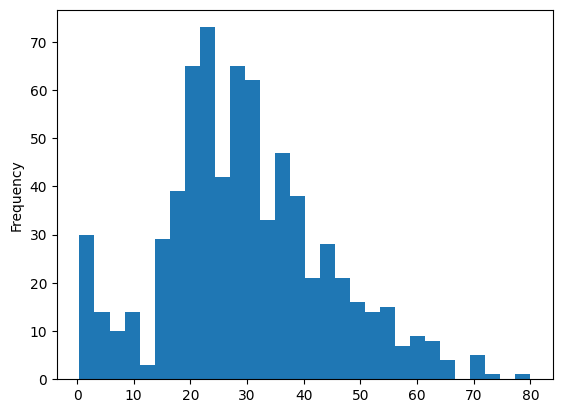

In [97]:
titanic_df['Age'].plot(kind='hist', bins=30)
plt.show()

In [98]:
numerik_df = titanic_df[titanic_df.describe().columns]
kategori_df = titanic_df.drop(columns=numerik_df)

In [99]:
numerik_df[:5]

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [100]:
kategori_df[:5]

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S


In [101]:
def plot_corr(data, x, y, hue=None, figsize=(12, 8)):
  plt.figure(figsize=figsize)

  for i, col in enumerate(data[x].drop(columns=[y]).columns):
    plt.subplot(3, 2, i+1)
    sns.scatterplot(data=data, x=col, y=y, hue=hue, label=f"corr: {round(data[y].corr(data[col]), 2)}")
    plt.grid(alpha=.4)
    plt.legend()

  plt.tight_layout(w_pad=5)
  plt.show()

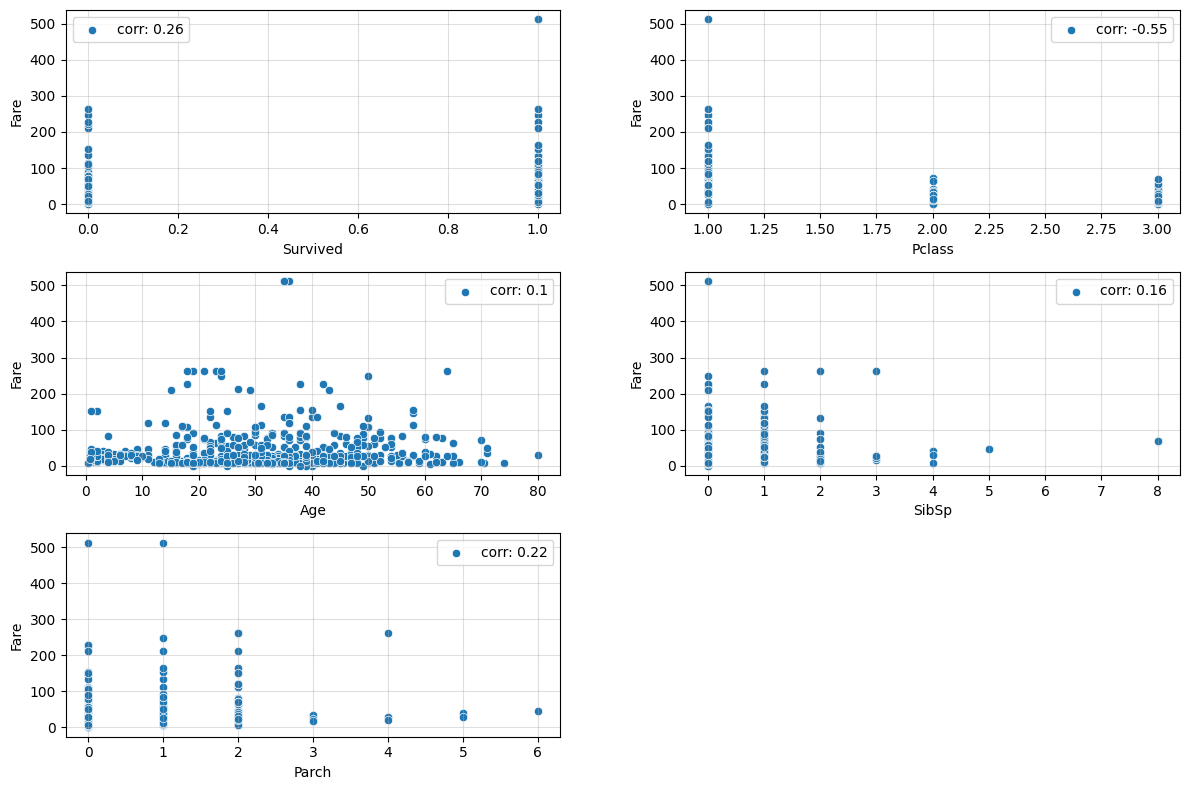

In [102]:
plot_corr(titanic_df, x=numerik_df.drop(columns=['PassengerId']).columns, y='Fare')

In [103]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [104]:
titanic_df[['Age', 'Fare']].quantile([0.1, 0.99])

,Age,Fare
0.10,14.00,7.55000
0.99,65.87,249.00622


In [105]:
class Clean_Data:
  def __init__(self, data, target_columns):
    self.target_columns = target_columns
    self.data = data

  def detect_outlier(self):
    q1, q3, iqr, lower_limit, upper_limit = {}, {}, {}, {}, {}
    select_data = self.data[self.target_columns].quantile([.25, .75])

    for key, val in select_data.to_dict().items():  
      q1[key] = val[0.25]
      q3[key] = val[0.75]
      iqr[key] = q3[key] - q1[key]
      lower_limit[key], upper_limit[key] = q1[key] - 1.5*iqr[key], q3[key] + 1.5*iqr[key]

    self.lower_limit = lower_limit
    self.upper_limit = upper_limit
    self.q1 = q1
    self.q3 = q3
    self.iqr = iqr

  def remove_outlier(self):
    new_df = self.data.copy(deep=True)
    for col in self.target_columns:
      new_df = new_df[new_df[col].between(self.lower_limit[col], self.upper_limit[col])]
    
    return new_df

In [106]:
target_columns = ['Age', 'Fare']

clean_df = Clean_Data(titanic_df, target_columns)
clean_df.detect_outlier()
titanic_df_fixed  = clean_df.remove_outlier()

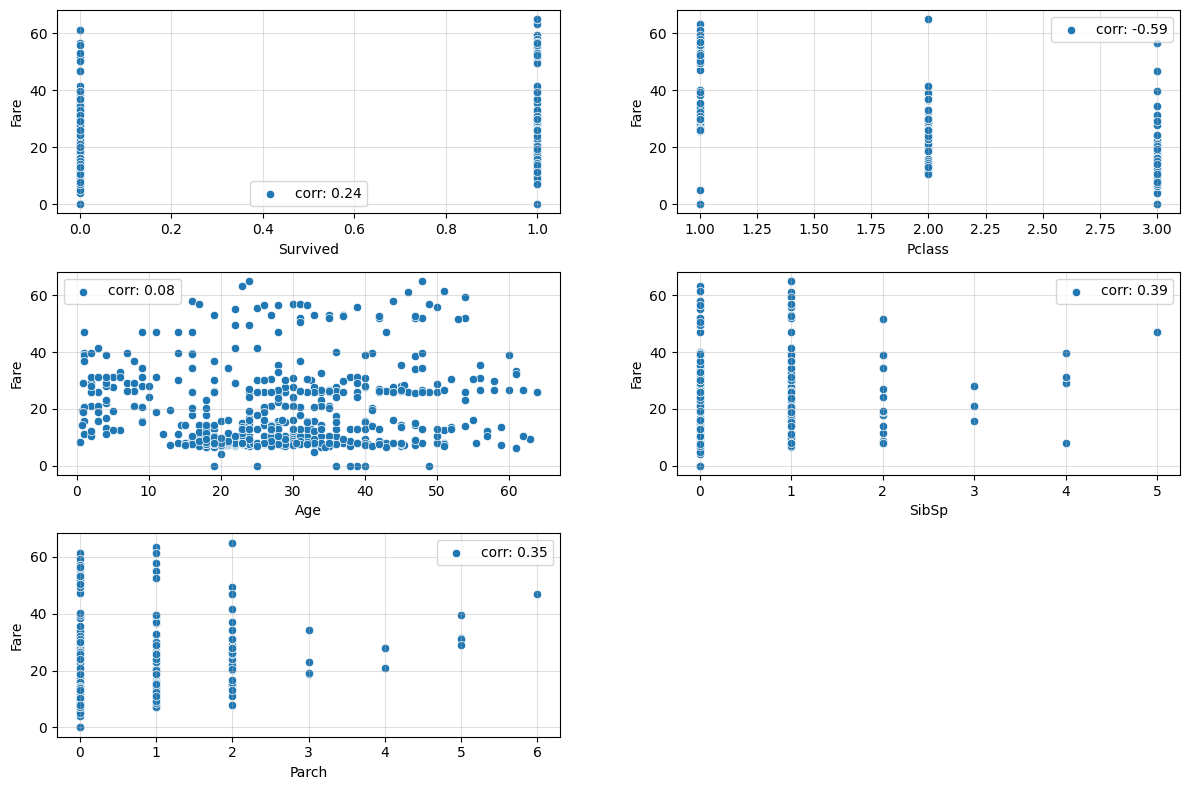

In [107]:
plot_corr(titanic_df_fixed, x=numerik_df.drop(columns=['PassengerId']).columns, y='Fare')

In [108]:
titanic_df_fixed.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000
mean,449.960199,0.358209,2.442786,28.269900,0.495854,0.406302,18.608250
std,262.770927,0.479872,0.727687,13.468892,0.961674,0.854397,13.654694
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,212.500000,0.000000,2.000000,20.000000,0.000000,0.000000,7.925000
50%,448.000000,0.000000,3.000000,28.000000,0.000000,0.000000,13.000000
75%,684.500000,1.000000,3.000000,36.000000,1.000000,1.000000,26.250000
max,891.000000,1.000000,3.000000,64.000000,5.000000,6.000000,65.000000


In [109]:
print(f'original: {titanic_df.shape}')
print(f'cleaned: {titanic_df_fixed.shape}')

original: (891, 12)
cleaned: (603, 12)
